## Visualize training of static VAE on circle/Gaussian data

- Input: circles on gaussian-blob backgroudn (32x32)
- Number of latents: 4


In [17]:
import torch
import pickle
from models import staticVAE32

import matplotlib.pyplot as plt
import numpy as np

In [16]:
vae = staticVAE32(n_latent = 4)
checkpoint = torch.load('trained/staticvae32_dsprites_circle_last_100K')
vae.load_state_dict(checkpoint['model_states']['net'])

training_stats = pickle.load(open('trained/staticvae32_dsprites_circle_100K.pkl', 'rb'))

#### plot training loss



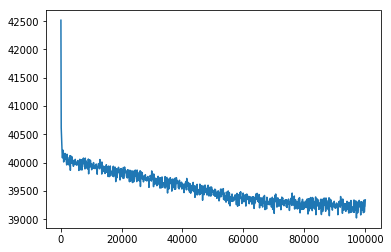

In [19]:
plt.plot(training_stats['iter'], training_stats['recon_loss'])

### load some data and plot reconstructions


In [33]:
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append("..") # Adds higher directory to python modules path.
from data.dspritesb import dSpriteBackgroundDataset, Rescale

ds = dSpriteBackgroundDataset(transform=Rescale(32),shapetype = 'circle')


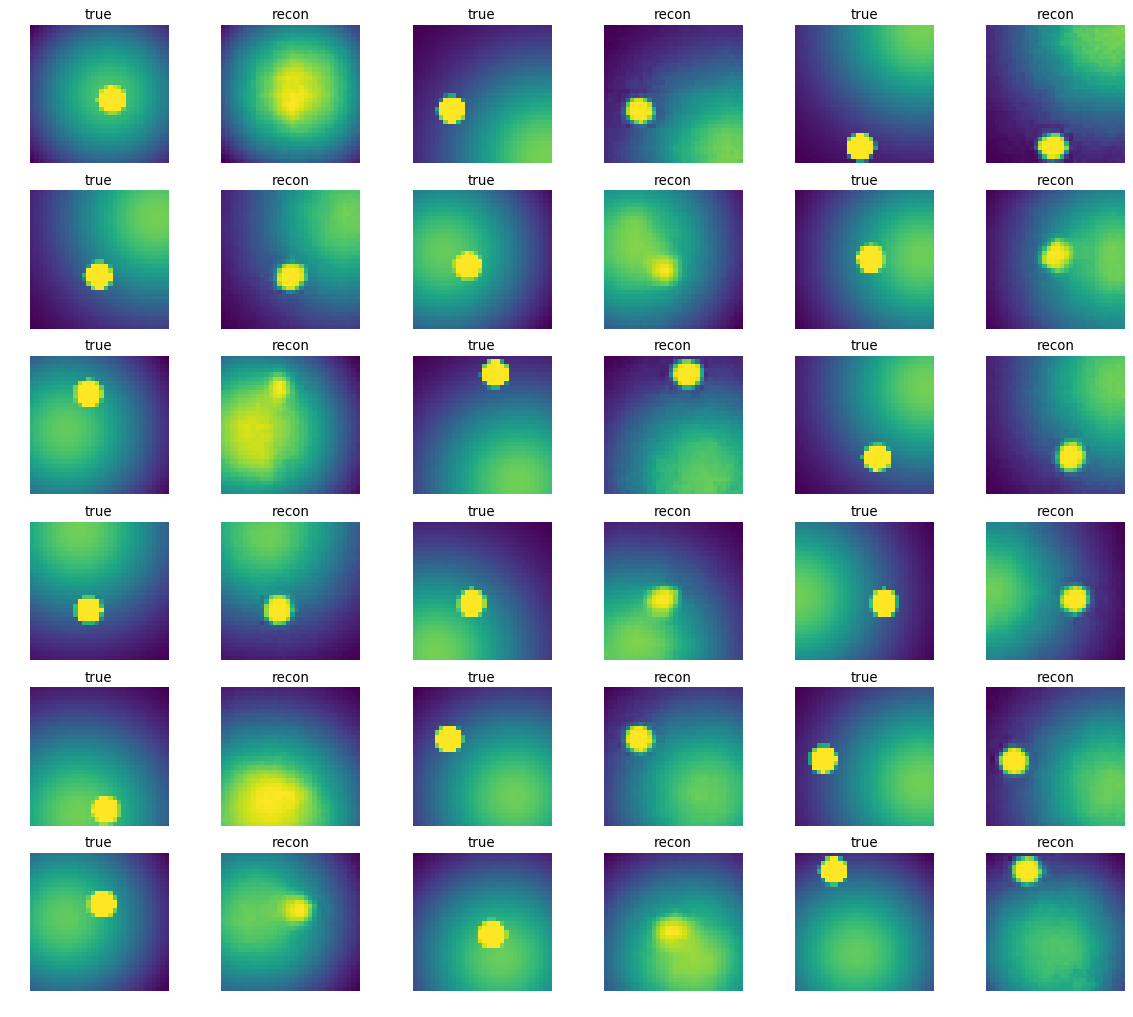

In [46]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
cnt = 0
for ii in range(18):
    cnt += 1
    ax = plt.subplot(6,6,cnt)
    x = ds.__getitem__(np.random.randint(1000))
    x = x['image']
    ax.imshow(x)
    plt.title('true')
    plt.axis('off')
    cnt += 1
    ax = plt.subplot(6,6,cnt)
    recon, mu, logvar = vae(torch.tensor(x[np.newaxis, np.newaxis,:, :]).float())
    ax.imshow(recon.detach().numpy().squeeze())
    plt.title('recon')
    plt.axis('off')

### Visualize entanglement/disentanglement

Each row is a sweep from -2 to 2 in one dimension while fixing the others at 0.

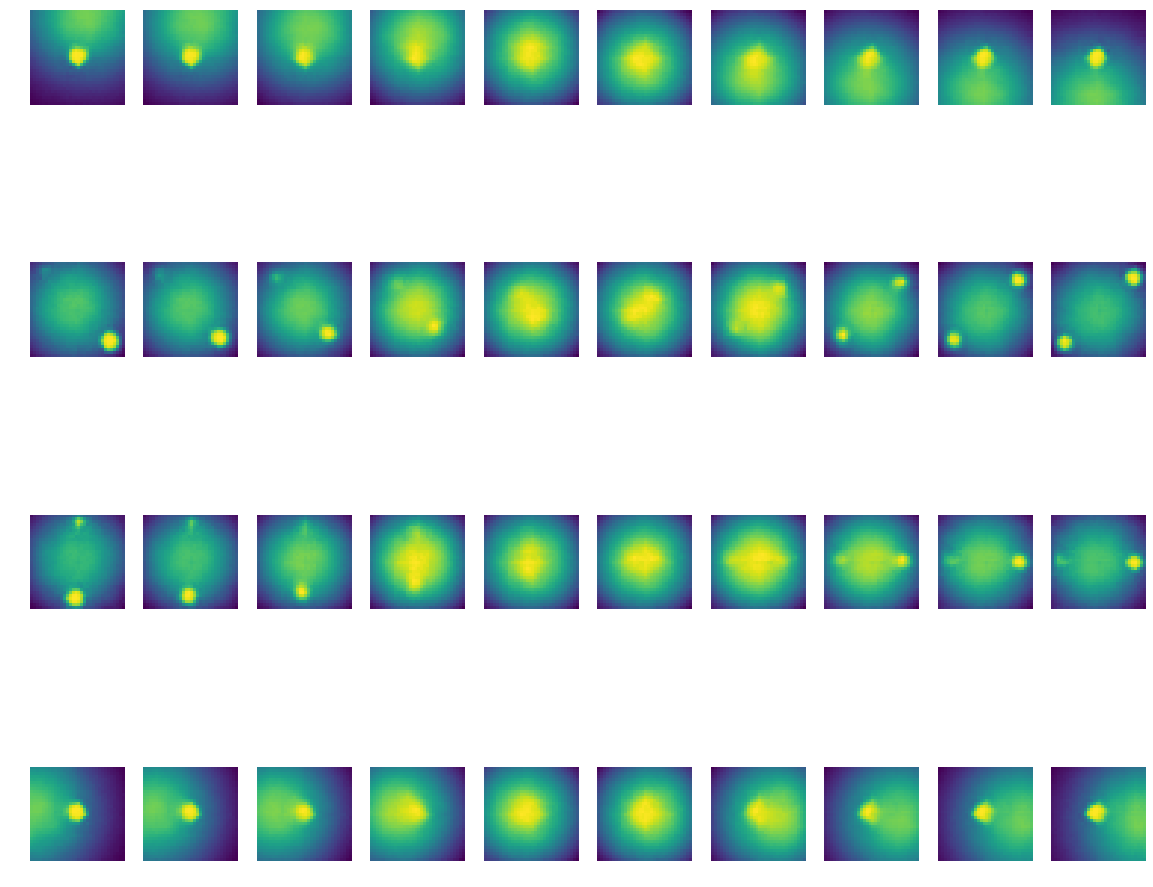

In [65]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
z_points = np.linspace(-2,2, 10)
len(z_points)
for ii in range(4):
    for jj in range(len(z_points)):
        latent = torch.zeros(1,4)
        latent[0,ii] = z_points[jj]
        
        rec = vae.decode(latent)
        ax = plt.subplot(4,len(z_points),ii*len(z_points) + jj + 1)
        ax.imshow(rec.detach().numpy().squeeze())
        plt.axis('off')